In [13]:
import numpy, scipy, matplotlib.pyplot as plt, sklearn, librosa, urllib, IPython.display
import essentia, essentia.standard as ess
import numpy as np
import librosa.display
import signal
plt.rcParams['figure.figsize'] = (14,4)

from scipy.signal import butter, lfilter, freqz

import glob
from pathlib import Path, PurePath

filelist = []

for filename in Path('music').glob('**/*.mp3'):
    filelist.append(filename)
    
for filename in Path('music').glob('**/*.wav'):
    filelist.append(filename)
    
path = str(PurePath(filelist[4]))

path = ('music/guitar.mp3')

print(path)

x, fs = librosa.load(path)
#x = x[:fs*30]
mfcc = librosa.feature.mfcc(y=x, sr=fs, n_mfcc=12)


music/guitar.mp3


In [14]:
def extract_mfcc(x, fs):
    mfcc = librosa.feature.mfcc(y=x, sr=fs, n_mfcc=12)
    mean = numpy.mean(mfcc, axis=1)
    #print(mean)
    var = numpy.var(mfcc, axis=1)
    #print(var)
    cov = numpy.cov(mfcc)
    
    #get only upper triangular matrix values to shorten length
    iu1 = np.triu_indices(12)
    cov = cov[iu1]
    
    return mean, cov

In [15]:
print(extract_mfcc(x, fs))

(array([-2.58762477e+02,  1.35458869e+02, -1.87156331e+01,  3.02545494e+01,
        4.19250999e+00,  1.10615603e+01,  2.55676307e+00,  7.02011753e+00,
       -3.68123738e-02,  2.46992369e+00, -4.11331622e+00, -9.97948176e+00]), array([ 2.06254624e+04,  5.55849682e+03, -2.70381388e+03,  1.01636942e+03,
       -9.97205235e+02,  1.36964146e+02, -6.65444165e+02, -2.74703859e+01,
       -4.96695543e+02,  4.45244230e+01, -3.76024816e+02, -6.23853876e+02,
        2.80808972e+03, -8.82986069e+02,  3.50470420e+02, -7.89684522e+01,
       -4.71016638e+01, -1.07743408e+02, -7.61424387e+01, -8.27166385e+01,
       -7.51939914e+01, -9.07743968e+01, -2.23623149e+02,  6.35358384e+02,
       -1.65383645e+02,  1.47530987e+02,  3.80063019e+01,  1.21068400e+02,
        2.68302461e+01,  1.19747911e+01,  5.20932008e+00,  7.34898601e+01,
        8.03549293e+01,  1.30173437e+02, -2.92728758e+01,  1.76397101e+01,
       -2.89028232e+01,  7.47596322e+00,  3.30523073e+00,  4.20017543e+00,
       -2.51102627e+01

In [16]:
#filter audio signal

import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Filter requirements.
order = 6
fs = fs
cutoff_hp = 128  # desired cutoff frequency of the filter, Hz
cutoff_lp = 4096  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_highpass(cutoff_hp, fs, order)

data = x

# Filter the data, and plot both the original and filtered signals.
x_hp_filtered = butter_highpass_filter(data, cutoff_hp, fs, order)

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff_lp, fs, order)

data = x_hp_filtered

# Filter the data, and plot both the original and filtered signals.
x_lp_filtered = butter_lowpass_filter(data, cutoff_lp, fs, order)

IPython.display.Audio(x_lp_filtered, rate=fs)
#chroma features for "melody only" highpass filtered audio data

#original audio signal - extract max chroma key only
chroma = librosa.feature.chroma_stft(x_hp_filtered, fs)

7.45205982358287
99.38401442307692
[0, 4, 4, 2, 7, 7, 11, 11, 11, 11, 6, 6, 4, 4, 2, 7, 7, 7, 11, 11, 11, 6, 6, 4, 4, 4, 7, 7, 2, 11, 11, 11, 11, 6, 6, 4, 4, 4, 7, 7, 7, 11, 11, 11, 11, 6, 6, 4, 4]


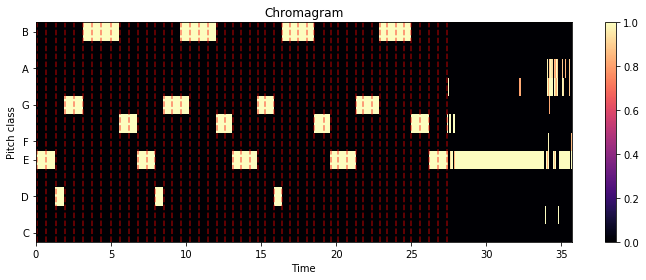

In [17]:
chroma = librosa.feature.chroma_stft(x, fs)

threshold = 300
m, n = chroma.shape

avg = 0
chroma = chroma.transpose()
m, n = chroma.shape

for j in chroma:
    avg = avg + np.sum(j)
    
avg = avg / m
threshold = avg 

print(threshold)

for i in chroma:
    if np.sum(i) > threshold:
        ind = np.where(i == np.max(i))
        max_val = i[ind]#is always 1!
        i[ind] = 0
        
        ind2 = np.where(i == np.max(i))
        i[ind] = 1
        
        if np.any(i[ind2] >= 0.8 * max_val):
            #i[ind2] = i[ind2]
            pass
        #low_values_flags = i < 1
        low_values_flags = i < 0.8
        
        i[low_values_flags] = 0
    else:
        i.fill(0)     
        
chroma = chroma.transpose()        

tempo, beats = librosa.beat.beat_track(x, fs)#
print(tempo)
onset_env = librosa.onset.onset_strength(x, fs, aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env,sr=fs)
hop_length = 512
times = librosa.frames_to_time(np.arange(len(onset_env)), sr=fs, hop_length=hop_length)

prev_beat = 0
act_beat = 0
sum_key = np.zeros(12)

chroma = chroma.transpose()  

for i in beats:
    act_beat = i
    sum_key = sum(chroma[prev_beat:act_beat])
    #print(sum_key)
    #print(chroma[prev_beat:act_beat])

    ind = np.where(sum_key == np.max(sum_key))
    #print("debug")
    fill = np.zeros(len(j))
    fill[ind] = 1
    chroma[prev_beat:act_beat] = fill
    #print(chroma[prev_beat:act_beat])
    prev_beat = i
    #print("BEAT")

chroma = chroma.transpose()  
    
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.vlines(times[beats], 0, 12, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

chroma = chroma.transpose()  

notes = []
for i in notes:
    del i

for i in beats:
    act_beat = i
    sum_key = sum(chroma[prev_beat:act_beat])
    ind = np.where(sum_key == np.max(sum_key))
    prev_beat = i
    notes.append(ind[0][0])
  
#chroma = chroma.transpose()  
print(notes)

In [18]:
def extract_chroma(x, fs):
    # Filter requirements.
    order = 6
    fs = fs
    cutoff_hp = 128  # desired cutoff frequency of the filter, Hz
    cutoff_lp = 4096  # desired cutoff frequency of the filter, Hz

    # Get the filter coefficients so we can check its frequency response.
    b, a = butter_highpass(cutoff_hp, fs, order)
    data = x

    # Filter the data, and plot both the original and filtered signals.
    x_hp_filtered = butter_highpass_filter(data, cutoff_hp, fs, order)

    # Get the filter coefficients so we can check its frequency response.
    b, a = butter_lowpass(cutoff_lp, fs, order)

    data = x_hp_filtered

    # Filter the data, and plot both the original and filtered signals.
    x_lp_filtered = butter_lowpass_filter(data, cutoff_lp, fs, order)

    IPython.display.Audio(x_lp_filtered, rate=fs)
    #chroma features for "melody only" highpass filtered audio data

    #original audio signal - extract max chroma key only
    chroma = librosa.feature.chroma_stft(x_hp_filtered, fs)
    avg = 0
    
    chroma = chroma.transpose()
    m, n = chroma.shape

    for j in chroma:
        avg = avg + np.sum(j)

    avg = avg / m
    threshold = avg * 2 

    for i in chroma:
        if np.sum(i) < threshold:
            ind = np.where(i == np.max(i))
            max_val = i[ind]#is always 1!
            i[ind] = 0

            ind2 = np.where(i == np.max(i))
            i[ind] = 1

            if np.any(i[ind2] >= 0.8 * max_val):
                #i[ind2] = i[ind2]
                pass
            #low_values_flags = i < 1
            low_values_flags = i < 0.8

            i[low_values_flags] = 0
        else:
            i.fill(0)         

    tempo, beats = librosa.beat.beat_track(x, fs)#
    #print(tempo)
    onset_env = librosa.onset.onset_strength(x, fs, aggregate=np.median)
    tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env,sr=fs)
    hop_length = 512
    times = librosa.frames_to_time(np.arange(len(onset_env)), sr=fs, hop_length=hop_length)

    prev_beat = 0
    act_beat = 0
    sum_key = np.zeros(12)

    for i in beats:
        act_beat = i
        sum_key = sum(chroma[prev_beat:act_beat])
        #print(sum_key)
        #print(chroma[prev_beat:act_beat])

        ind = np.where(sum_key == np.max(sum_key))
        #print("debug")
        fill = np.zeros(len(j))
        fill[ind] = 1
        chroma[prev_beat:act_beat] = fill
        #print(chroma[prev_beat:act_beat])
        prev_beat = i
        #print("BEAT")

    notes = []
    for i in notes:
        del i

    for i in beats:
        act_beat = i
        sum_key = sum(chroma[prev_beat:act_beat])
        ind = np.where(sum_key == np.max(sum_key))
        prev_beat = i
        notes.append(ind[0][0])

    chroma = chroma.transpose()  
    
    return tempo, notes

In [19]:
print(extract_chroma(x, fs))

(99.38401442307692, [0, 4, 11, 2, 2, 11, 11, 11, 11, 6, 6, 6, 4, 4, 2, 2, 11, 7, 11, 11, 6, 6, 6, 4, 4, 11, 2, 7, 2, 11, 11, 11, 11, 6, 6, 4, 4, 4, 6, 2, 7, 11, 11, 11, 11, 6, 6, 4, 4])


In [20]:
extract_mfcc(x, fs)

(array([-2.58762477e+02,  1.35458869e+02, -1.87156331e+01,  3.02545494e+01,
         4.19250999e+00,  1.10615603e+01,  2.55676307e+00,  7.02011753e+00,
        -3.68123738e-02,  2.46992369e+00, -4.11331622e+00, -9.97948176e+00]),
 array([ 2.06254624e+04,  5.55849682e+03, -2.70381388e+03,  1.01636942e+03,
        -9.97205235e+02,  1.36964146e+02, -6.65444165e+02, -2.74703859e+01,
        -4.96695543e+02,  4.45244230e+01, -3.76024816e+02, -6.23853876e+02,
         2.80808972e+03, -8.82986069e+02,  3.50470420e+02, -7.89684522e+01,
        -4.71016638e+01, -1.07743408e+02, -7.61424387e+01, -8.27166385e+01,
        -7.51939914e+01, -9.07743968e+01, -2.23623149e+02,  6.35358384e+02,
        -1.65383645e+02,  1.47530987e+02,  3.80063019e+01,  1.21068400e+02,
         2.68302461e+01,  1.19747911e+01,  5.20932008e+00,  7.34898601e+01,
         8.03549293e+01,  1.30173437e+02, -2.92728758e+01,  1.76397101e+01,
        -2.89028232e+01,  7.47596322e+00,  3.30523073e+00,  4.20017543e+00,
        -2

('BPM:', 148.13375854492188)
Overall BPM (estimated before): 148.1
First histogram peak: 148.0 bpm
Second histogram peak: 99.0 bpm


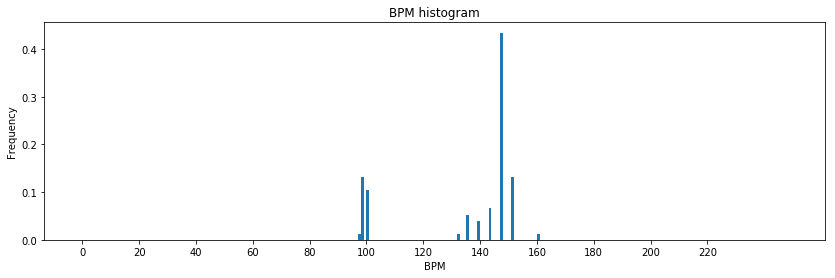

In [21]:
import essentia
import essentia.standard as es
from essentia.standard import *

fs = 44100

path = 'music/guitar.mp3'

# Loading audio file
audio = MonoLoader(filename=path, sampleRate=fs)()

#analysis sample rate (audio will be converted to it before analysis, recommended and default value is 44100.0)
# Compute all features, aggregate only 'mean' and 'stdev' statistics for all low-level, rhythm and tonal frame features
features, features_frames = es.MusicExtractor(lowlevelStats=['mean', 'stdev'])(path)

# See all feature names in the pool in a sorted order
#print("MFCC mean:", features['lowlevel.mfcc.mean'])
#print("MFCC mean:", features['lowlevel.mfcc.cov'])

# Compute beat positions and BPM
rhythm_extractor = RhythmExtractor2013(method="multifeature")
bpm, beats, beats_confidence, _, beats_intervals = rhythm_extractor(audio)

print("BPM:", bpm)
#print("Beat positions (sec.):", beats)
#print("Beat estimation confidence:", beats_confidence)

# Mark beat positions on the audio and write it to a file
# Let's use beeps instead of white noise to mark them, as it's more distinctive
#marker = AudioOnsetsMarker(onsets=beats, type='beep')
#marked_audio = marker(audio)
#MonoWriter(filename='music/dubstep_beats.wav')(marked_audio)

peak1_bpm, peak1_weight, peak1_spread, peak2_bpm, peak2_weight, peak2_spread, histogram = BpmHistogramDescriptors()(beats_intervals)

print("Overall BPM (estimated before): %0.1f" % bpm)
print("First histogram peak: %0.1f bpm" % peak1_bpm)
print("Second histogram peak: %0.1f bpm" % peak2_bpm)

fig, ax = plt.subplots()
ax.bar(range(len(histogram)), histogram, width=1)
ax.set_xlabel('BPM')
ax.set_ylabel('Frequency')
plt.title("BPM histogram")
ax.set_xticks([20 * x + 0.5 for x in range(int(len(histogram) / 20))])
ax.set_xticklabels([str(20 * x) for x in range(int(len(histogram) / 20))])
plt.show()

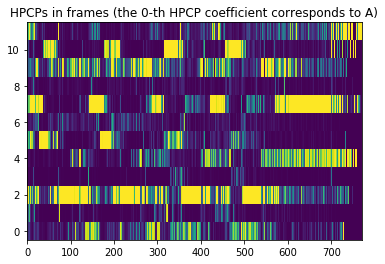

('Estimated key and scale:', 'E minor')


In [22]:
import essentia.streaming as ess
from pylab import plot, show, figure, imshow
%matplotlib inline
import matplotlib.pyplot as plt

# Initialize algorithms we will use

frameSize = 4096#512
hopSize = 2048#256

#will resample if sampleRate is different!
loader = ess.MonoLoader(filename=path, sampleRate=44100)
framecutter = ess.FrameCutter(frameSize=frameSize, hopSize=hopSize, silentFrames='noise')
windowing = ess.Windowing(type='blackmanharris62')
spectrum = ess.Spectrum()
spectralpeaks = ess.SpectralPeaks(orderBy='magnitude',
                                  magnitudeThreshold=0.00001,
                                  minFrequency=20,
                                  maxFrequency=3500,
                                  maxPeaks=60)

# Use default HPCP parameters for plots, however we will need higher resolution
# and custom parameters for better Key estimation

hpcp = ess.HPCP()
hpcp_key = ess.HPCP(size=36, # we will need higher resolution for Key estimation
                    referenceFrequency=440, # assume tuning frequency is 44100.
                    bandPreset=False,
                    minFrequency=20,
                    maxFrequency=3500,
                    weightType='cosine',
                    nonLinear=False,
                    windowSize=1.)

key = ess.Key(profileType='edma', # Use profile for electronic music
              numHarmonics=4,
              pcpSize=36,
              slope=0.6,
              usePolyphony=True,
              useThreeChords=True)

# Use pool to store data
pool = essentia.Pool()

# Connect streaming algorithms
loader.audio >> framecutter.signal
framecutter.frame >> windowing.frame >> spectrum.frame
spectrum.spectrum >> spectralpeaks.spectrum
spectralpeaks.magnitudes >> hpcp.magnitudes
spectralpeaks.frequencies >> hpcp.frequencies
spectralpeaks.magnitudes >> hpcp_key.magnitudes
spectralpeaks.frequencies >> hpcp_key.frequencies
hpcp_key.hpcp >> key.pcp
hpcp.hpcp >> (pool, 'tonal.hpcp')
key.key >> (pool, 'tonal.key_key')
key.scale >> (pool, 'tonal.key_scale')
key.strength >> (pool, 'tonal.key_strength')

# Run streaming network
essentia.run(loader)

# Plot HPCP
imshow(pool['tonal.hpcp'].T, aspect='auto', origin='lower', interpolation='none')
plt.title("HPCPs in frames (the 0-th HPCP coefficient corresponds to A)")
show()

print("Estimated key and scale:", pool['tonal.key_key'] + " " + pool['tonal.key_scale'])

[[0.24287762 0.15015237 0.27412218 ... 0.         0.         0.        ]
 [0.08999374 0.05310614 0.28149572 ... 0.         0.         0.        ]
 [0.3495945  1.         0.59206027 ... 0.         0.         0.        ]
 ...
 [0.13697433 0.11397339 0.08214706 ... 0.         0.         0.        ]
 [0.10369609 0.13873762 0.18140699 ... 0.         0.         0.        ]
 [0.8017666  0.51208246 1.         ... 1.         1.         0.        ]]
[0, 7, 7, 7, 5, 10, 10, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 7, 5, 5, 10, 2, 2, 2, 2, 2, 2, 9, 9, 9, 0, 7, 7, 10, 10, 10, 10, 5, 2, 2, 2, 2, 2, 9, 4, 2, 7, 7, 7, 7, 10, 10, 10, 10, 2, 2, 2, 2, 9, 9, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 11, 11, 11, 11]


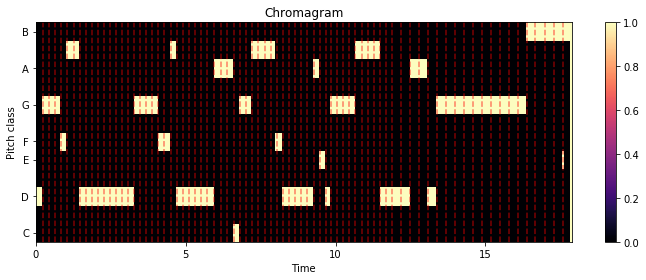

In [23]:
print(pool['tonal.hpcp'].T)
chroma = pool['tonal.hpcp'].T
#print(chroma.shape)


threshold = 300
m, n = chroma.shape

avg = 0
chroma = chroma.transpose()
m, n = chroma.shape

for j in chroma:
    avg = avg + np.sum(j)
    
avg = avg / m
threshold = avg * 2 

#print(threshold)

for i in chroma:
    if np.sum(i) < threshold:
        ind = np.where(i == np.max(i))
        max_val = i[ind]#is always 1!
        i[ind] = 0
        
        ind2 = np.where(i == np.max(i))
        i[ind] = 1
        
        if np.any(i[ind2] >= 0.6 * max_val):
            #i[ind2] = i[ind2]
            pass
        #low_values_flags = i < 1
        low_values_flags = i < 0.8
        
        i[low_values_flags] = 0
    else:
        i.fill(0)     
        
chroma = chroma.transpose()     

tempo = bpm
times = beats
#print("Beat positions (sec.):", beats)
beats_frames = (beats * fs) / hopSize
beats_frames = beats_frames.astype(int)
#print("Beat positions (frame.):", beats_frames)
 

prev_beat = 0
act_beat = 0
sum_key = np.zeros(12)

chroma = chroma.transpose()  

for i in beats_frames:
    act_beat = i
    sum_key = sum(chroma[prev_beat:act_beat])
    #print(sum_key)
    #print(chroma[prev_beat:act_beat])

    ind = np.where(sum_key == np.max(sum_key))
    #print("debug")
    fill = np.zeros(len(j))
    fill[ind] = 1
    chroma[prev_beat:act_beat] = fill
    #print(chroma[prev_beat:act_beat])
    prev_beat = i
    #print("BEAT")

chroma = chroma.transpose()  
    
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.vlines(times / 2, 0, 12, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

chroma = chroma.transpose()  

notes = []
for i in notes:
    del i

for i in beats_frames:
    act_beat = i
    sum_key = sum(chroma[prev_beat:act_beat])
    ind = np.where(sum_key == np.max(sum_key))
    prev_beat = i
    notes.append(ind[0][0])
    
chroma = chroma.transpose()  

print(notes)



[[0.24287762 0.15015237 0.27412218 ... 0.         0.         0.        ]
 [0.08999374 0.05310614 0.28149572 ... 0.         0.         0.        ]
 [0.3495945  1.         0.59206027 ... 0.         0.         0.        ]
 ...
 [0.13697433 0.11397339 0.08214706 ... 0.         0.         0.        ]
 [0.10369609 0.13873762 0.18140699 ... 0.         0.         0.        ]
 [0.8017666  0.51208246 1.         ... 1.         1.         0.        ]]
(12, 770)
('Beat positions (sec.):', array([ 0.44117913,  0.8707483 ,  1.2887075 ,  1.6834466 ,  2.0897958 ,
        2.507755  ,  2.9141042 ,  3.3204534 ,  3.7268026 ,  4.133152  ,
        4.539501  ,  4.9342403 ,  5.3405895 ,  5.7469387 ,  6.153288  ,
        6.559637  ,  6.954376  ,  7.3607254 ,  7.7670746 ,  8.173424  ,
        8.579773  ,  8.997732  ,  9.404081  ,  9.810431  , 10.21678   ,
       10.623129  , 11.029478  , 11.447437  , 11.888617  , 12.329796  ,
       12.770975  , 13.200544  , 13.630114  , 14.036463  , 14.431202  ,
       14.83755

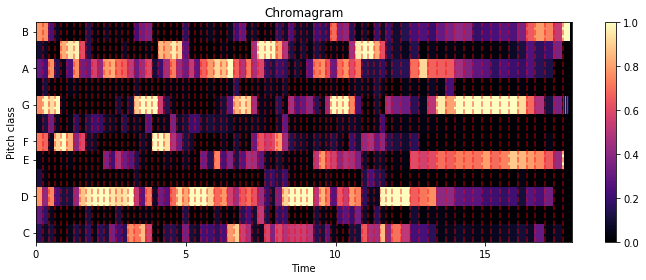

In [24]:
print(pool['tonal.hpcp'].T)
chroma = pool['tonal.hpcp'].T
print(chroma.shape)


threshold = 300
m, n = chroma.shape
    

tempo = bpm
times = beats
print("Beat positions (sec.):", beats)
beats_frames = (beats * fs) / hopSize
beats_frames = beats_frames.astype(int)
print("Beat positions (frame.):", beats_frames)
 

prev_beat = 0
act_beat = 0
sum_key = np.zeros(12)

chroma = chroma.transpose()  

for i in beats_frames:
    act_beat = i

    chroma[prev_beat:act_beat] = sum(chroma[prev_beat:act_beat])/(act_beat-prev_beat)
    #print(chroma[prev_beat:act_beat])
    prev_beat = i
    #print("BEAT")

chroma = chroma.transpose()  
    
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.vlines(times / 2, 0, 12, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()


